In [73]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import imageio
import PIL # actually from the 'pillow' package
import math

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing import image

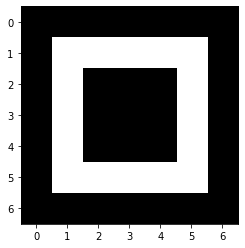

In [74]:
# let's define that simple figure as a matrix and plot it
plt.imshow(

    np.array(
    [[ 0,   0,   0,   0,   0,   0, 0 ],
     [ 0, 255, 255, 255, 255, 255, 0 ],
     [ 0, 255,   0,   0,   0, 255, 0 ],
     [ 0, 255,   0,   0,   0, 255, 0 ],
     [ 0, 255,   0,   0,   0, 255, 0 ],
     [ 0, 255, 255, 255, 255, 255, 0 ],
     [ 0,   0,   0,   0,   0,   0, 0 ]], dtype='uint8'),
    
    cmap='gray')

plt.show()

Empty red square on blue background:


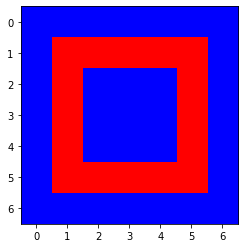

In [75]:
### Drawing an empty red square on a blue background
# define our R/G/B channels, combine them into a 3d array and plot them
dimensions = [7,7,3]
red = np.array(
    [[ 0,   0,   0,   0,   0,   0, 0 ],
     [ 0, 255, 255, 255, 255, 255, 0 ],
     [ 0, 255,   0,   0,   0, 255, 0 ],
     [ 0, 255,   0,   0,   0, 255, 0 ],
     [ 0, 255,   0,   0,   0, 255, 0 ],
     [ 0, 255, 255, 255, 255, 255, 0 ],
     [ 0,   0,   0,   0,   0,   0, 0 ]], dtype='uint8')

green = np.array([[0 for _ in range(dimensions[1])] for _ in range(dimensions[0])], dtype='uint8')

blue = np.array([[255 if red[i][j]==0 else 0 for j in range(dimensions[1])]
                 for i in range(dimensions[0])], dtype='uint8')

rsq_blue = np.dstack([red, green, blue])

print("Empty red square on blue background:")
plt.imshow( rsq_blue )
plt.show()

Empty yellow square on pink background:


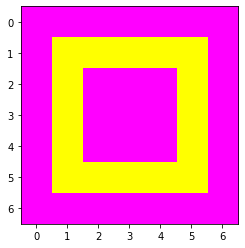

In [76]:
### Drawing an empty yellow square on a pink/purple background
# define our R/G/B channels, combine them into a 3d array and plot them

red = np.array([[255 for _ in range(dimensions[1])] for _ in range(dimensions[0])], dtype='uint8')

green = np.array(
    [[ 0,   0,   0,   0,   0,   0, 0 ],
     [ 0, 255, 255, 255, 255, 255, 0 ],
     [ 0, 255,   0,   0,   0, 255, 0 ],
     [ 0, 255,   0,   0,   0, 255, 0 ],
     [ 0, 255,   0,   0,   0, 255, 0 ],
     [ 0, 255, 255, 255, 255, 255, 0 ],
     [ 0,   0,   0,   0,   0,   0, 0 ]], dtype='uint8')

blue = np.array([[255 if green[i][j]==0 else 0 for j in range(dimensions[1])]
                 for i in range(dimensions[0])], dtype='uint8')

ysq_pink = np.dstack([red, green, blue])

print("Empty yellow square on pink background:")
plt.imshow( ysq_pink )
plt.show()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in ubyte_scalars
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in ubyte_scalars
  


Text(0.5, 1.0, '2 - 1:')

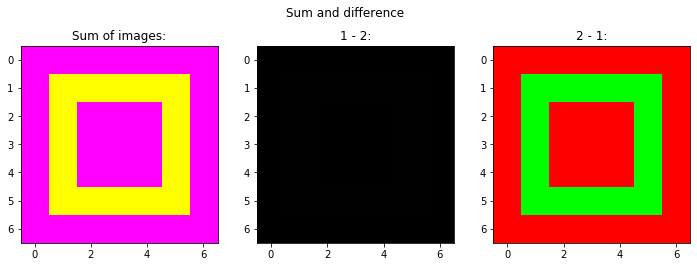

In [77]:
### Plotting the sum and difference of the images
image_sum = np.array([[[rsq_blue[i][j][k] + ysq_pink[i][j][k] for k in range(dimensions[2])]
              for j in range(dimensions[1])]
             for i in range(dimensions[0])])

image_bdif_1 = np.array([[[rsq_blue[i][j][k] - ysq_pink[i][j][k] for k in range(dimensions[2])]
              for j in range(dimensions[1])]
             for i in range(dimensions[0])])

image_bdif_2 = np.array([[[ysq_pink[i][j][k] - rsq_blue[i][j][k] for k in range(dimensions[2])]
              for j in range(dimensions[1])]
             for i in range(dimensions[0])])

#Data visualisation
fig, axs = plt.subplots(1,3)
fig.suptitle("Sum and difference")
fig.set_size_inches(12, 4)

axs[0].imshow( image_bsum )
axs[0].set_title("Sum of images:")

axs[1].imshow( image_bdif_1 )
axs[1].set_title("1 - 2:")

axs[2].imshow( image_bdif_2 )
axs[2].set_title("2 - 1:")


Text(0.5, 1.0, '2 - 1:')

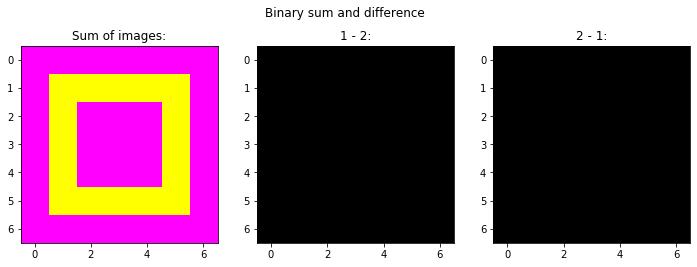

In [78]:
### Plotting the sum and difference of the images as binary sum
image_bsum = np.array([[[rsq_blue[i][j][k] + ysq_pink[i][j][k]
                        if float(rsq_blue[i][j][k]) + float(ysq_pink[i][j][k]) <= 255 
                        else 255
                        for k in range(dimensions[2])]
              for j in range(dimensions[1])]
             for i in range(dimensions[0])])

image_bdif_1 = np.array([[[rsq_blue[i][j][k] - ysq_pink[i][j][k]
                         if float(rsq_blue[i][j][k]) - float(ysq_pink[i][j][k]) >= 0
                         else 0
                         for k in range(dimensions[2])]
              for j in range(dimensions[1])]
             for i in range(dimensions[0])])

image_bdif_2 = np.array([[[ysq_pink[i][j][k] - rsq_blue[i][j][k]
                         if float(rsq_blue[i][j][k]) - float(ysq_pink[i][j][k]) >= 0
                         else 0
                         for k in range(dimensions[2])]
              for j in range(dimensions[1])]
             for i in range(dimensions[0])])

#Data visualisation
fig, axs = plt.subplots(1,3)
fig.suptitle("Binary sum and difference")
fig.set_size_inches(12, 4)

axs[0].imshow( image_bsum )
axs[0].set_title("Sum of images:")

axs[1].imshow( image_bdif_1 )
axs[1].set_title("1 - 2:")

axs[2].imshow( image_bdif_2 )
axs[2].set_title("2 - 1:")

In [79]:
# convolution function for source 2d array with 3x3 kernel, no padding
def Convolve_3_3_nopadding(source, kernel):
    source, kernel = np.array(source), np.array(kernel)
    flattened_kernel = kernel.ravel()
    source_dimensions = source.shape
    dimensions_diff = [source_dimensions[i] - 3 for i in range(len(source_dimensions))]

    try:
        if kernel.shape[0] != 3 and kernel.shape[1] != 3:
            raise AttributeError("ERROR: Given kernel is not a 3x3 matrix")
        if source_dimensions[0] < 3 and source_dimensions[1] < 3:
            raise AttributeError("ERROR: Given image is smaller than 3x3 matrix")
        
        output = np.array([[np.dot(source[i:i+3,j:j+3].ravel(),flattened_kernel) 
                   for j in range(dimensions_diff[1])] 
                  for i in range(dimensions_diff[0])])

    except AttributeError as Error:
        print(Error)
    
    return output

In [123]:
def Convolve(source, kernel, padding = None):
    """
    Performs convolution given the kernel over the source image. Stride = 1 and padding can be chosen
    Parameters:
    source: matrix of numbers
    kernel: matrix of numbers smaller than the source
    padding: 0, 1 or None (default)
    """
    source, kernel = np.array(source), np.array(kernel)
    if padding == 0:
        source = np.pad(source, ((1,1),(1,1)), "constant")
    elif padding == 1:
        source = np.pad(source, ((1,1),(1,1)), "constant", constant_values = 255)
    source_dimensions, kernel_dimensions = source.shape, kernel.shape
    flattened_kernel = kernel.ravel()
    dimensions_diff = [source_dimensions[i] - 3 for i in range(len(source_dimensions))]    

    try:
        if source_dimensions[0] < kernel_dimensions[0] and source_dimensions[1] < kernel_dimensions[1]:
            raise AttributeError("ERROR: Given image is smaller than the kernel in at least one dimension even after padding")
        
        output = np.array([[np.dot(source[i:i+kernel_dimensions[0],j:j+kernel_dimensions[1]].ravel(),flattened_kernel) 
                   for j in range(dimensions_diff[1])] 
                  for i in range(dimensions_diff[0])])

    except AttributeError as Error:
        print(Error)
    
    return output

Source image:


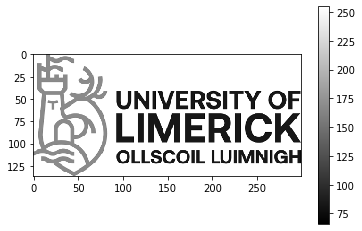

Activation map #1 (kernel 1):


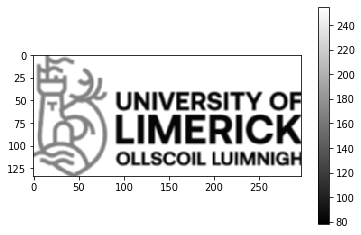

Activation map #2 (kernel 2):


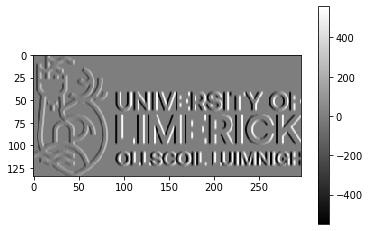

Activation map #3 (kernel 3):


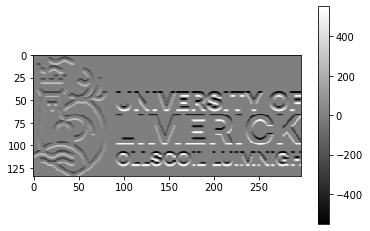

Activation map #4 (kernel 4):


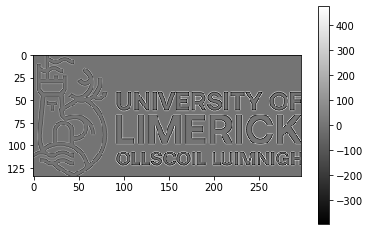

Activation map #5 (kernel 2 then kernel 3):


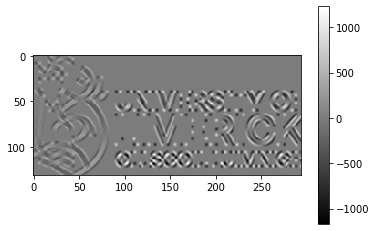

In [124]:
### Test code

def showimage(im):
    plt.imshow(im, cmap='gray')
    plt.colorbar()
    plt.show()
    
    
# read source RGB image as 3 channel image and strip out a single channel
img = imageio.imread('images/ulcrest_small.png')[:,:,1] # strip out one channel: 0=red, 1=green, 2=blue

print("Source image:")
plt.imshow(img, cmap='gray')
plt.colorbar()
plt.show()

# define various 2d convolution kernels
kernel_1 = np.array(
    [[ .1, .1, .1 ],
     [ .1, .2, .1 ],
     [ .1, .1, .1 ]], dtype='float32')

kernel_2 = np.array(
    [[ -1,  0,  1 ],
     [ -1,  0,  1 ],
     [ -1,  0,  1 ]], dtype='float32')

kernel_3 = np.array(
    [[ -1, -1, -1 ],
     [  0,  0,  0 ],
     [  1,  1,  1 ]], dtype='float32')

kernel_4 = np.array(
    [[  0, -1,  0 ],
     [ -1,  4, -1 ],
     [  0, -1,  0 ]], dtype='float32')



# convolve and display
activationmap_1 = Convolve_3_3_nopadding(img, kernel_1)
print("Activation map #1 (kernel 1):")
showimage(activationmap_1)

activationmap_2 = Convolve_3_3_nopadding(img, kernel_2)
print("Activation map #2 (kernel 2):")
showimage(activationmap_2)

activationmap_3 = Convolve_3_3_nopadding(img, kernel_3)
print("Activation map #3 (kernel 3):")
showimage(activationmap_3)

activationmap_4 = Convolve_3_3_nopadding(img, kernel_4)
print("Activation map #4 (kernel 4):")
showimage(activationmap_4)

activationmap_5 = Convolve_3_3_nopadding(activationmap_2, kernel_3)
print("Activation map #5 (kernel 2 then kernel 3):")
showimage(activationmap_5)


Testing exemplary task function with padding
Kernel3, no padding


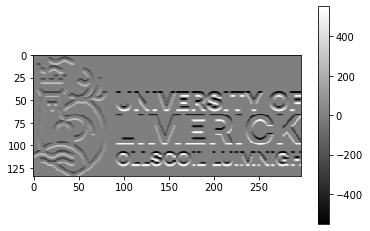

Kernel3, padding=0


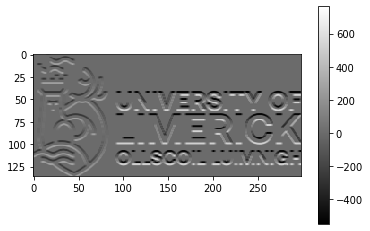

Kernel3, padding=1


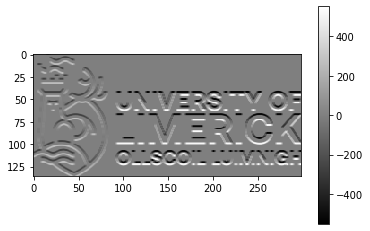

In [125]:
output1 = Convolve(img, kernel_3)
output2 = Convolve(img, kernel_3, 0)
output3 = Convolve(img, kernel_3, 1)

print("Testing exemplary task function with padding")

print("Kernel3, no padding")
showimage(output1)

print("Kernel3, padding=0")
showimage(output2)

print("Kernel3, padding=1")
showimage(output3)

Testing exemplary task function with padding and other bigger kernel
kernel_other, no padding


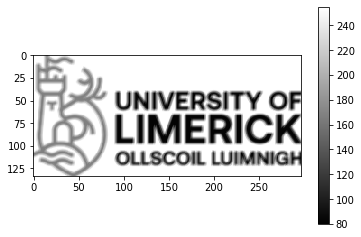

kernel_other, padding=0


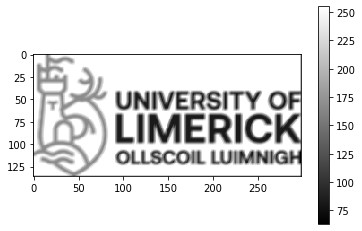

kernel_other, padding=1


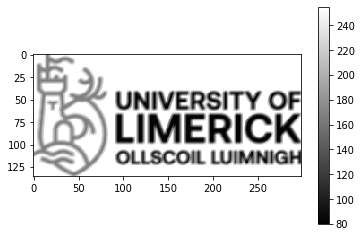

In [127]:
kernel_other = np.array(
    [[ .05, .1, 0 , .1],
     [ .1, 0, .1, .1],
     [ .1, .1, .1, 0 ],
     [ .05, 0, .1, 0]], dtype='float32')
output1 = Convolve(img, kernel_other)
output2 = Convolve(img, kernel_other, 0)
output3 = Convolve(img, kernel_other, 1)

print("Testing exemplary task function with padding and other bigger kernel")

print("kernel_other, no padding")
showimage(output1)

print("kernel_other, padding=0")
showimage(output2)

print("kernel_other, padding=1")
showimage(output3)

In [102]:
# Max-pooling function for a 2x2 window size with a stride of 2
def Maxpooling_2_2_stride2(source):
    stride = 2
    window_dimensions = [2,2]
    source = np.array(source)
    source_dimensions = source.shape
    jumps = [math.ceil((source_dimensions[i]-window_dimensions[i])/stride) for i in range(len(source_dimensions))]
    output = [[0 for _ in range(jumps[1])] for _ in range(jumps[0])]
    for i in range(jumps[0]): # going down
        upper_boundary = i*stride
        lower_boundary = upper_boundary+window_dimensions[0]
        while lower_boundary >= source_dimensions[0]: # shorten the box from down if index is out of range
            lower_boundary = lower_boundary-1
        for j in range(jumps[1]): # going to the right
            left_boundary = j*stride
            right_boundary = left_boundary+window_dimensions[1]
            while right_boundary >= source_dimensions[1]: # shorten the box from roght if index is out of range
                right_boundary = right_boundary-1
            output[i][j] = np.matrix(source[upper_boundary:lower_boundary, left_boundary:right_boundary]).max()
                
    return output

In [128]:
def Maxpooling(source, window_dimensions = [2,2], strides = [2,2]):
    """
    Performs maxpooling given the window dimensions and strides over the source image.
    Parameters:
    source: matrix of numbers
    window_dimensions: tuple or list with the expected window dimensions. Default: [2,2]
    strides: tuple or list with the expected stride valiues. Default: [2,2]
    """
    source = np.array(source)
    source_dimensions = source.shape
    jumps = [math.ceil((source_dimensions[i]-window_dimensions[i])/strides[i]) for i in range(len(source_dimensions))]
    output = [[0 for _ in range(jumps[1])] for _ in range(jumps[0])]
    for i in range(jumps[0]): # going down
        upper_boundary = i*strides[0]
        lower_boundary = upper_boundary+window_dimensions[0]
        while lower_boundary >= source_dimensions[0]: # shorten the box from down if index is out of range
            lower_boundary = lower_boundary-1
        for j in range(jumps[1]): # going to the right
            left_boundary = j*strides[1]
            right_boundary = left_boundary+window_dimensions[1]
            while right_boundary >= source_dimensions[1]: # shorten the box from roght if index is out of range
                right_boundary = right_boundary-1
            output[i][j] = np.matrix(source[upper_boundary:lower_boundary, left_boundary:right_boundary]).max()
                
    return output

Source image:


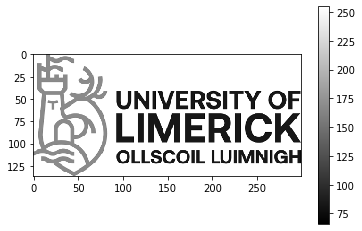

Pooling #1:


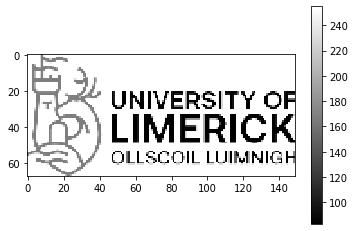

Pooling #2:


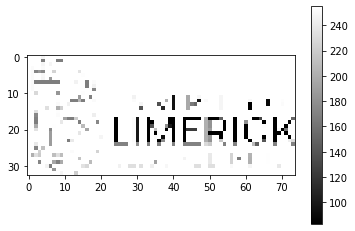

Pooling #3:


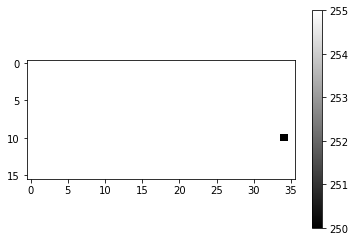

Pooling #4:


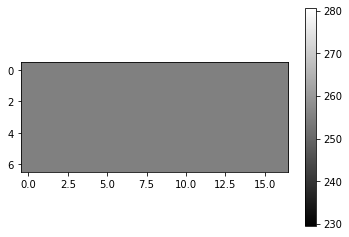

In [103]:
### Test code

# read source RGB image and take a single channel
img = imageio.imread('images/ulcrest_small.png')[:,:,1] # 0=red, 1=green, 2=blue
print("Source image:")
plt.imshow(img, cmap='gray')
plt.colorbar()
plt.show()

# run a few pooling operations and display the result

# max pool and display
pooled_1 = Maxpooling_2_2_stride2(img)
print("Pooling #1:")
plt.imshow(pooled_1, cmap='gray')
plt.colorbar()
plt.show()

pooled_2 = Maxpooling_2_2_stride2(pooled_1)
print("Pooling #2:")
plt.imshow(pooled_2, cmap='gray')
plt.colorbar()
plt.show()

pooled_3 = Maxpooling_2_2_stride2(pooled_2)
print("Pooling #3:")
plt.imshow(pooled_3, cmap='gray')
plt.colorbar()
plt.show()

pooled_4 = Maxpooling_2_2_stride2(pooled_3)
print("Pooling #4:")
plt.imshow(pooled_4, cmap='gray')
plt.colorbar()
plt.show()

Source image:


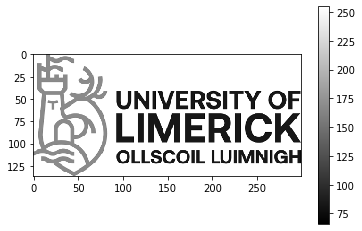

Pooling with window 3x3, and strides 3x3 over the original image:


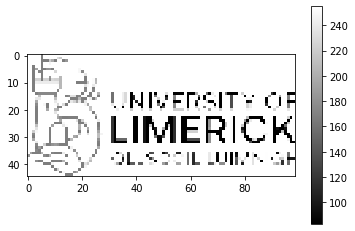

Pooling with window 2x2, and strides 1x2 over the original image:


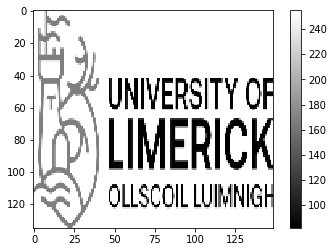

Pooling with window 3x4, and strides 1x3 over the original image:


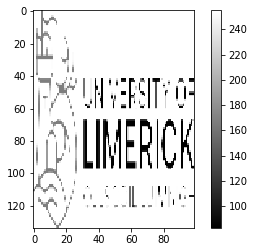

In [130]:
print("Source image:")
plt.imshow(img, cmap='gray')
plt.colorbar()
plt.show()

# max pool and display
test_pooled_1 = Maxpooling(img,[3,3],[3,3])
print("Pooling with window 3x3, and strides 3x3 over the original image:")
plt.imshow(test_pooled_1, cmap='gray')
plt.colorbar()
plt.show()

test_pooled_2 = Maxpooling(img,[2,2],[1,2])
print("Pooling with window 2x2, and strides 1x2 over the original image:")
plt.imshow(test_pooled_2, cmap='gray')
plt.colorbar()
plt.show()

test_pooled_3 = Maxpooling(img,[3,4],[1,3])
print("Pooling with window 3x4, and strides 1x3 over the original image:")
plt.imshow(test_pooled_3, cmap='gray')
plt.colorbar()
plt.show()

In [158]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense


# define network topology
net = Sequential()

net.add(Conv2D(32, (3, 3), padding="same", activation="relu",input_shape=(64,64,3)))
net.add(MaxPooling2D(pool_size=(2, 2), strides=2))
net.add(Flatten())
net.add(Dense(128, activation="relu"))
net.add(Dense(1, activation="sigmoid"))
 
net.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

**Ungraded task:** look at the model summary below, and see if you can understand the number of parameters that will require optimisation in each layer.

In [159]:
#net.build((None,64,64,3))
net.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               4194432   
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 129       
Total params: 4,195,457
Trainable params: 4,195,457
Non-trainable params: 0
_________________________________________________________________


In [160]:
# generate data sets
from keras.preprocessing.image import ImageDataGenerator
import PIL


train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory("data/catdog/training_set",
                                                 target_size = ( 64,64 ),
                                                 batch_size = 32,
                                                 class_mode = "binary")
test_set = test_datagen.flow_from_directory("data/catdog/test_set",
                                            target_size = ( 64,64 ),
                                            batch_size = 32,
                                            class_mode = "binary")

Found 2404 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [161]:
net.fit_generator(training_set,
        steps_per_epoch=200,
        epochs=10,
        validation_data=test_set,
        validation_steps=500)

Epoch 1/10
200/200 [==============================] - 114s 571ms/step - loss: 0.6592 - accuracy: 0.6306 - val_loss: 0.6930 - val_accuracy: 0.6801
Epoch 2/10
200/200 [==============================] - 99s 496ms/step - loss: 0.5569 - accuracy: 0.7106 - val_loss: 0.8983 - val_accuracy: 0.6654
Epoch 3/10
200/200 [==============================] - 103s 514ms/step - loss: 0.5133 - accuracy: 0.7516 - val_loss: 0.7536 - val_accuracy: 0.7225
Epoch 4/10
200/200 [==============================] - 96s 479ms/step - loss: 0.4819 - accuracy: 0.7665 - val_loss: 0.5386 - val_accuracy: 0.7103
Epoch 5/10
200/200 [==============================] - 96s 479ms/step - loss: 0.4640 - accuracy: 0.7787 - val_loss: 0.4446 - val_accuracy: 0.7317
Epoch 6/10
200/200 [==============================] - 88s 442ms/step - loss: 0.4296 - accuracy: 0.8001 - val_loss: 0.6896 - val_accuracy: 0.7137
Epoch 7/10
200/200 [==============================] - 87s 436ms/step - loss: 0.4143 - accuracy: 0.8094 - val_loss: 0.5335 - val_

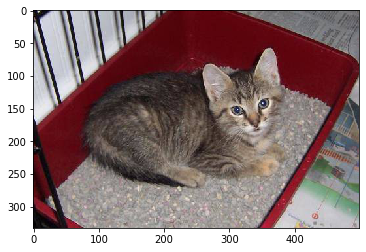

cat


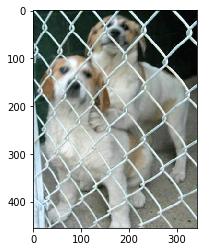

dog


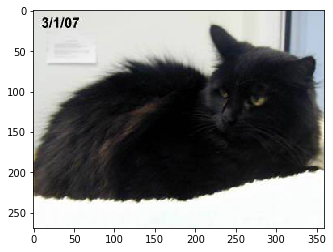

cat


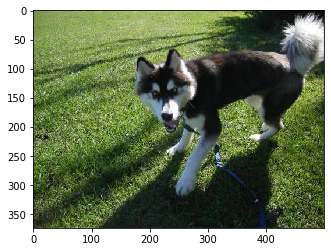

dog


In [162]:
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


def classifyimage(imagepath):
    test_image = image.load_img(imagepath, target_size = (64, 64))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = net.predict(test_image)
    training_set.class_indices
    if result[0][0] == 1:
        prediction = 'dog'
    else:
        prediction = 'cat'
    
    img = mpimg.imread(imagepath)
    plt.imshow(img)
    plt.show()
    print(prediction)

classifyimage('data/catdog/cat_or_dog_1.jpg')
classifyimage('data/catdog/cat_or_dog_2.jpg')
classifyimage('data/catdog/cat_or_dog_3.jpg')
classifyimage('data/catdog/cat_or_dog_4.jpg')